<a href="https://colab.research.google.com/github/martharegina/machine-learning/blob/main/music_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Dataset diperoleh dari [link](https://statso.io/music-popularity-case-study/#google_vignette). Case study ini merupakan bahan latihan dari [link](https://thecleverprogrammer.com/2024/07/08/music-popularity-prediction-with-python/).

Thank you so much for this guided project! Very appreciated.

In [151]:
df = pd.read_csv('Spotify_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

Popularity adalah target variabel, sehingga saya perlu mencoba melihat hubungannya berbagai fitur terhadap popularity.

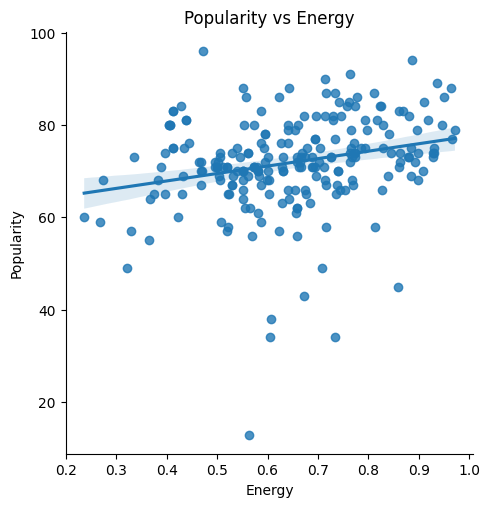

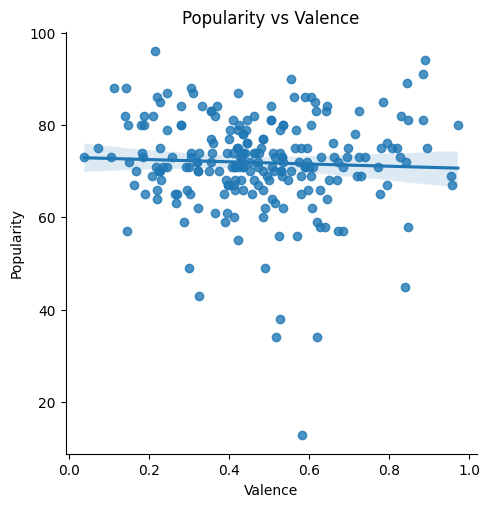

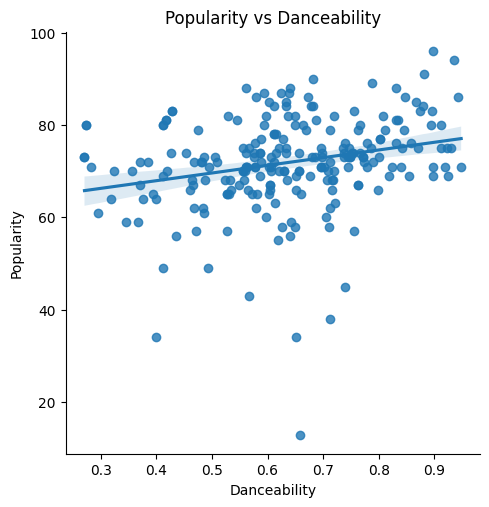

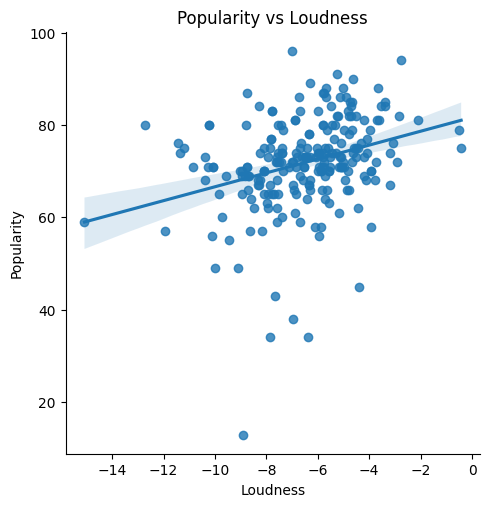

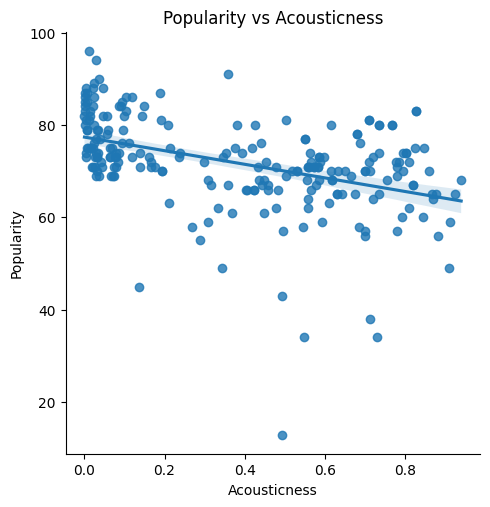

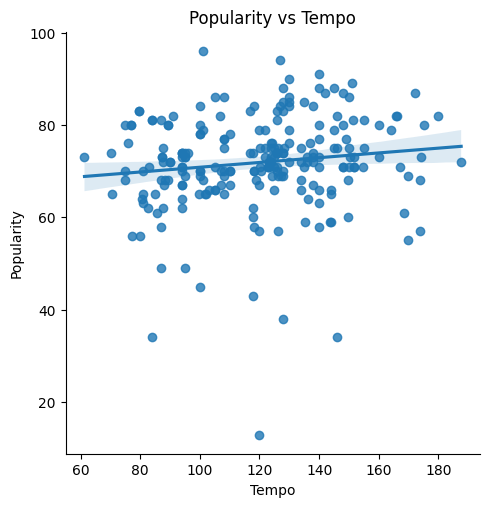

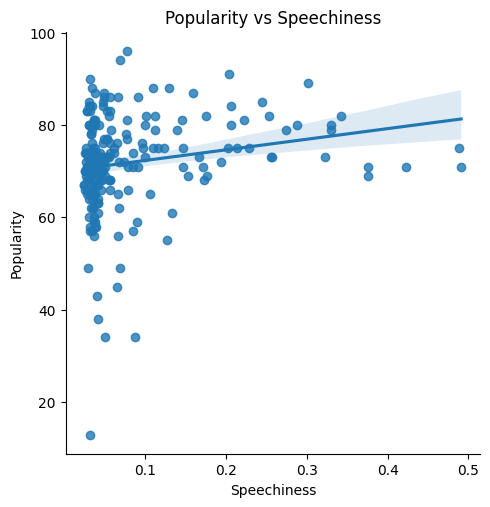

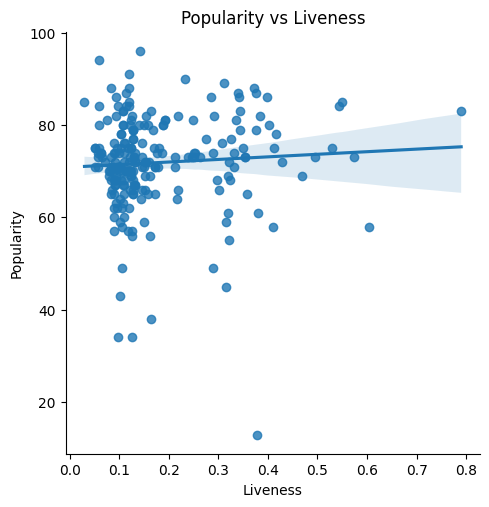

In [153]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']

for feature in features:
  sns.lmplot(x=feature, y='Popularity', data=df)
  plt.title(f'Popularity vs {feature}')
  plt.show()

Saya melihat adanya korelasi positif antara popularity dengan energy, danceability, loudness, speechiness, dan tempo. Popularity dengan acousticness justru memiliki korelasi negatif. Untuk lebih jelas, saya akan membuat correlation matrix antar features dengan popularity.

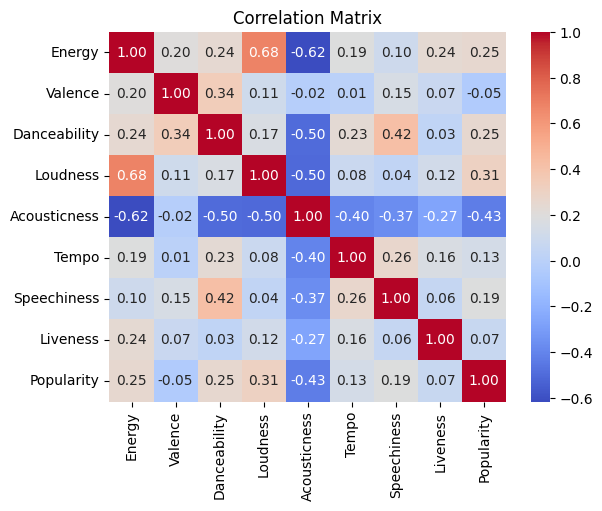

In [154]:
subset_df = df[features + ['Popularity']]
correlation = subset_df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

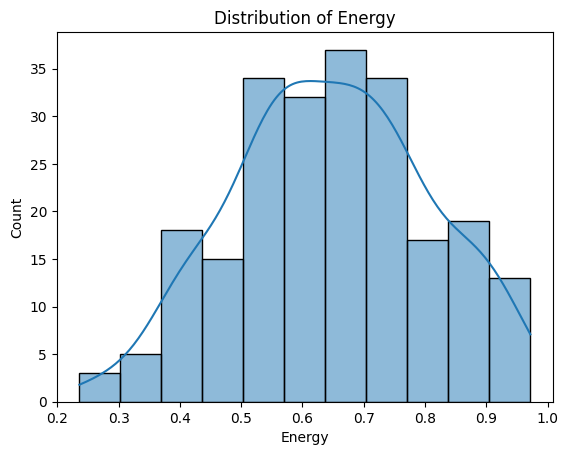

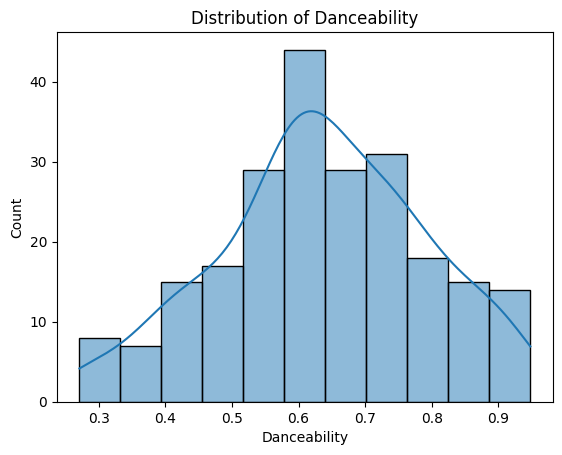

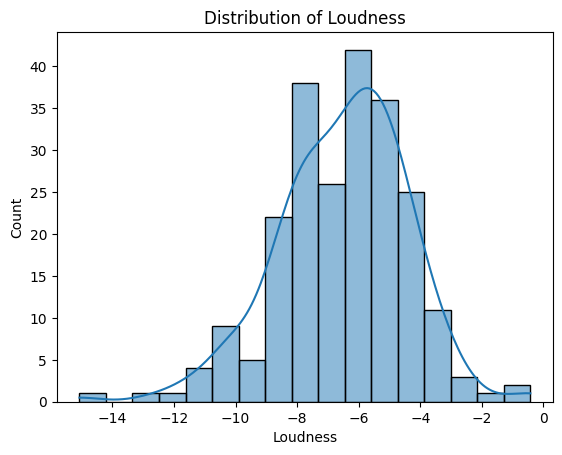

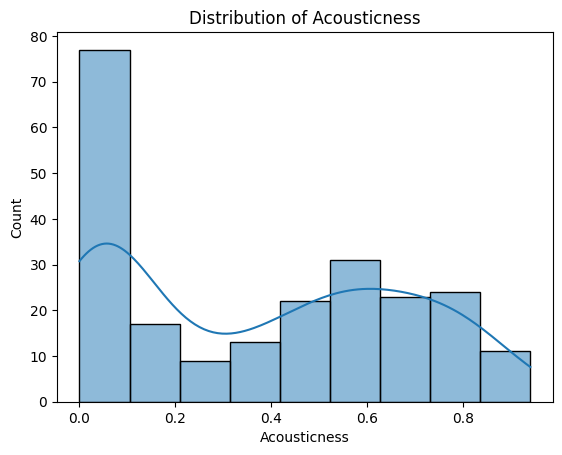

In [149]:
key_features = ['Energy', 'Danceability', 'Loudness', 'Acousticness']

for feature in key_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Preparing Data

In [155]:
X = df[key_features]
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [157]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [158]:
print("MSE:", mse)
print("R² Score:", r2)

MSE: 58.47633491240983
R² Score: 0.12144330676896331


# Random Forest Regressor

In [159]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [160]:
rf = RandomForestRegressor(random_state=42)

In [161]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [146]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [147]:
y_pred = random_search.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [148]:
print("Best Parameters:", random_search.best_params_)
print("MSE:", mse)
print("R² Score:", r2)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
MSE: 47.44185960978823
R² Score: 0.28722681813183826


In [165]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['sqrt', 'log2', None]
}

gbr = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    gbr,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best model
best_gbr = random_search.best_estimator_
y_pred_best = best_gbr.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("Best Parameters:", random_search.best_params_)
print("MSE:", mse)
print("R² Score:", r2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'learning_rate': np.float64(0.017625738023228556), 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 151, 'subsample': np.float64(0.7816377859881918)}
MSE: 35.27868605472348
R² Score: 0.4699680510380937
